# GTZAN Music and Speech - [kaggle]

### Dataset collected for the purposes of music/speech discrimination. The dataset consists of 120 tracks, each 30 seconds long. Each class (music/speech) has 60 examples. The tracks are all 22050Hz Mono 16-bit audio files in .wav format.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage import data
from scipy.misc import imresize
import IPython.display as ipyd

import tensorflow as tf
from libs import utils, gif, datasets, dataset_utils, vae, dft

%matplotlib inline
plt.style.use('ggplot')

c:\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
dataset = 'gtzan_music_speech'

music_dir = os.path.join(os.path.join(dataset, 'music_speech'), 'music_wav')

#music folder
music = [os.path.join(music_dir, file_i)
         for file_i in os.listdir(music_dir)
         if file_i.endswith('.wav')]


speech_dir = os.path.join(os.path.join(dataset, 'music_speech'), 'speech_wav')
# speech folder
speech = [os.path.join(speech_dir, file_i)
          for file_i in os.listdir(speech_dir)
          if file_i.endswith('.wav')]

print(music, speech)

['gtzan_music_speech\\music_speech\\music_wav\\bagpipe.wav', 'gtzan_music_speech\\music_speech\\music_wav\\ballad.wav', 'gtzan_music_speech\\music_speech\\music_wav\\bartok.wav', 'gtzan_music_speech\\music_speech\\music_wav\\beat.wav', 'gtzan_music_speech\\music_speech\\music_wav\\beatles.wav', 'gtzan_music_speech\\music_speech\\music_wav\\bigband.wav', 'gtzan_music_speech\\music_speech\\music_wav\\birdland.wav', 'gtzan_music_speech\\music_speech\\music_wav\\blues.wav', 'gtzan_music_speech\\music_speech\\music_wav\\bmarsalis.wav', 'gtzan_music_speech\\music_speech\\music_wav\\brahms.wav', 'gtzan_music_speech\\music_speech\\music_wav\\canonaki.wav', 'gtzan_music_speech\\music_speech\\music_wav\\caravan.wav', 'gtzan_music_speech\\music_speech\\music_wav\\chaka.wav', 'gtzan_music_speech\\music_speech\\music_wav\\classical.wav', 'gtzan_music_speech\\music_speech\\music_wav\\classical1.wav', 'gtzan_music_speech\\music_speech\\music_wav\\classical2.wav', 'gtzan_music_speech\\music_speech\\mu

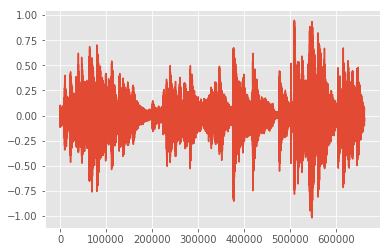

In [5]:
file_i = music[1]
s = utils.load_audio(file_i)
plt.plot(s)